### Import Datasets

In [41]:
import numpy as np
from glob import glob

human_path = "data/lfw/*/*"
dog_path = "data/dog_images/*/*/*"

human_files = np.array(glob( human_path ))
dog_files = np.array(glob( dog_path ))

print('%d Total human images.' % len(human_files))
print('%d Total dog images.' % len(dog_files))

13233 Total human images.
8351 Total dog images.


In [3]:
print(type(glob("data/lfw/*/*")))
print(human_files[0:5])
print(dog_files[0:5])

<class 'list'>
['data/lfw\\Aaron_Eckhart\\Aaron_Eckhart_0001.jpg'
 'data/lfw\\Aaron_Guiel\\Aaron_Guiel_0001.jpg'
 'data/lfw\\Aaron_Patterson\\Aaron_Patterson_0001.jpg'
 'data/lfw\\Aaron_Peirsol\\Aaron_Peirsol_0001.jpg'
 'data/lfw\\Aaron_Peirsol\\Aaron_Peirsol_0002.jpg']
['data/dog_images\\test\\001.Affenpinscher\\Affenpinscher_00003.jpg'
 'data/dog_images\\test\\001.Affenpinscher\\Affenpinscher_00023.jpg'
 'data/dog_images\\test\\001.Affenpinscher\\Affenpinscher_00036.jpg'
 'data/dog_images\\test\\001.Affenpinscher\\Affenpinscher_00047.jpg'
 'data/dog_images\\test\\001.Affenpinscher\\Affenpinscher_00048.jpg']


### Detect Humans
[Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html)

Number of faces detected: 3


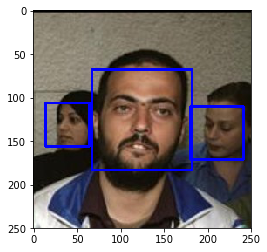

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

img = cv2.imread(human_files[15]) # <class 'numpy.ndarray'>
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert image to grayscale
faces = face_cascade.detectMultiScale(gray) # numpy array of detected faces in grayscale

print('Number of faces detected: {}'.format(len(faces)))

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2) # (image, start point, end point, color, pixel thickness)

cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(cv_rgb)
plt.show()

### Human Face Detector
Function to return True if human face is detected, else return False

In [5]:
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

print(face_detector(human_files[10]))
print(face_detector(dog_files[10]))

True
False


#### Assess the Human Face Detector

In [6]:
from tqdm import tqdm
import sys

human_files_short = human_files[:50]
dog_files_short = dog_files[:50]

human_face_counter = 0
dog_face_counter = 0

dog_and_human = []

for i in tqdm(range(len(human_files_short))):
    human_face = face_detector(human_files_short[i])
    dog_face = face_detector(dog_files_short[i])
    human_face_counter += human_face
    dog_face_counter += dog_face
    
    if dog_face == True:
        dog_and_human.append(i)
    
print("Human Imgs Face Detection %age: \t{}".format(human_face_counter / 500))
print("Dog Imgs Face Detection %age: \t{}".format(dog_face_counter / 500))
print("Ten entries from dog_and_human: {}".format(dog_and_human[:10]))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:05<00:00,  9.19it/s]

Human Imgs Face Detection %age: 	0.094
Dog Imgs Face Detection %age: 	0.016
Ten entries from dog_and_human: [15, 23, 28, 31, 37, 38, 39, 43]


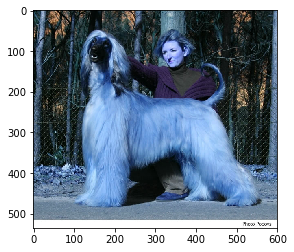

In [7]:
img = cv2.imread(dog_files_short[15])
plt.imshow(img)
plt.show()

In [8]:
import os
os.listdir('haarcascades/')

['haarcascade_eye.xml',
 'haarcascade_eye_tree_eyeglasses.xml',
 'haarcascade_frontalcatface.xml',
 'haarcascade_frontalcatface_extended.xml',
 'haarcascade_frontalface_alt.xml',
 'haarcascade_frontalface_alt2.xml',
 'haarcascade_frontalface_alt_tree.xml',
 'haarcascade_frontalface_default.xml',
 'haarcascade_fullbody.xml',
 'haarcascade_lefteye_2splits.xml',
 'haarcascade_licence_plate_rus_16stages.xml',
 'haarcascade_lowerbody.xml',
 'haarcascade_profileface.xml',
 'haarcascade_righteye_2splits.xml',
 'haarcascade_russian_plate_number.xml',
 'haarcascade_smile.xml',
 'haarcascade_upperbody.xml']

In [10]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt2.xml')

human_face_counter = 0
dog_face_counter = 0
dog_and_human = []

for i in tqdm(range(len(human_files_short))):
    human_face = face_detector(human_files_short[i])
    dog_face = face_detector(dog_files_short[i])
    human_face_counter += human_face
    dog_face_counter += dog_face
    
    if dog_face == True:
        dog_and_human.append(i)
    
print("Human Imgs Face Detection %age: \t{}".format(human_face_counter / 50))
print("Dog Imgs Face Detection %age: \t{}".format(dog_face_counter / 50))
print("Ten entries from dog_and_human: {}".format(dog_and_human[:10]))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:05<00:00,  9.59it/s]

Human Imgs Face Detection %age: 	0.96
Dog Imgs Face Detection %age: 	0.24
Ten entries from dog_and_human: [1, 15, 23, 24, 28, 31, 32, 37, 38, 39]


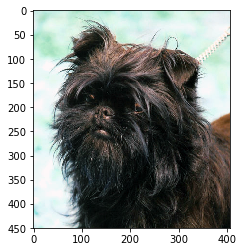

In [11]:
img = cv2.imread(dog_files_short[1])
plt.imshow(img)
plt.show()

In [12]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

human_face_counter = 0
dog_face_counter = 0
dog_and_human = []

for i in tqdm(range(len(human_files_short))):
    human_face = face_detector(human_files_short[i])
    dog_face = face_detector(dog_files_short[i])
    human_face_counter += human_face
    dog_face_counter += dog_face
    
    if dog_face == True:
        dog_and_human.append(i)
    
print("Human Imgs Face Detection %age: \t{}".format(human_face_counter / 50))
print("Dog Imgs Face Detection %age: \t{}".format(dog_face_counter / 50))
print("Ten entries from dog_and_human: {}".format(dog_and_human[:10]))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 10.60it/s]

Human Imgs Face Detection %age: 	1.0
Dog Imgs Face Detection %age: 	0.5
Ten entries from dog_and_human: [3, 5, 10, 12, 13, 15, 16, 17, 19, 20]


### Detect Dogs Using VGG-16 Imported Model

In [13]:
import torch
import torchvision.models as models

VGG16 = models.vgg16(pretrained=True)

if torch.cuda.is_available():
    VGG16 = VGG16.cuda()
    print("VGG16 has been moved to cuda device.".format(VGG16))
    
VGG16

VGG16 has been moved to cuda device.


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [14]:
for param in VGG16.features.parameters():
    param.requires_grad = False

### VGG Prediction Function

In [22]:
from matplotlib.pyplot import imshow
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):

    img = Image.open(img_path)

    transform = transforms.Compose([transforms.Resize((256,256)),
                                    transforms.CenterCrop(224),
                                    transforms.RandomRotation(35),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.47,0.47,0.47),
                                                        (0.47,0.47,0.47))])

    image_tensor = transform(img)
    image_tensor = image_tensor.unsqueeze(0)

    if torch.cuda.is_available():
        image_tensor = image_tensor.cuda()

    prediction = VGG16(image_tensor)
    prediction = prediction.cpu()

    predicted_class_index = prediction.data.numpy().argmax()

    return predicted_class_index

In [34]:
from PIL import Image

def dog_detector(img_path): 
    #Return true if dog is detected
    #Index between 151 and 268 inclusive

    predicted_class_index = VGG16_predict(img_path)

    if predicted_class_index >= 151 and predicted_class_index <= 268:
        return True
    else:
        return False

### Assess the dog detector

In [123]:
test_cases = 50
dog_counter = []

for i in range(test_cases):
    dog_detected = dog_detector(dog_files[i])
    if dog_detected == True:
        dog_counter.append(1)
    else:
        dog_counter.append(0)

result = np.asarray(dog_counter)
print(result.mean(), " Accuracy for 50 test cases")

test_cases = 500
dog_counter = []

for i in range(test_cases):
    dog_detected = dog_detector(dog_files[i])
    if dog_detected == True:
        dog_counter.append(1)
    else:
        dog_counter.append(0)

result = np.asarray(dog_counter)
print(result.mean(), "Accuracy for 500 test cases")

test_cases = 5000
dog_counter = []

for i in range(test_cases):
    dog_detected = dog_detector(dog_files[i])
    if dog_detected == True:
        dog_counter.append(1)
    else:
        dog_counter.append(0)

result = np.asarray(dog_counter)
print(result.mean(), "Accuracy for 5000 test cases")

NameError: name 'dog_detector' is not defined

In [100]:
# Split human data for testing, validation, training

human_paths_all = np.array(glob('data/lfw/*/*'))
dog_paths_train = np.array(glob('data/dog_images/train/*/*'))
dog_paths_test = np.array(glob('data/dog_images/test/*/*'))
dog_paths_valid = np.array(glob('data/dog_images/valid/*/*'))
dog_paths_len = len(dog_paths_train)+len(dog_paths_test)+len(dog_paths_valid)

# Split human data proportional with dog data

human_train_len = int(len(human_paths_all) * (len(dog_paths_train) / dog_paths_len))
human_valid_len = int(len(human_paths_all) * (len(dog_paths_valid) / dog_paths_len))
human_test_len = len(human_paths_all) - human_train_len - human_valid_len
assert len(human_paths_all) == (human_train_len + human_valid_len + human_test_len)

human_indices = list(range(len(human_paths_all)))
np.random.shuffle(human_indices)

all_train_data, all_valid_data, all_test_data = [], [], []

#all_train_data.append(human_path[human_indices[0:human_train_len]])

for i in human_indices[0:human_train_len]:
    all_train_data.append(human_path[i])

for i in human_indices[human_train_len:-human_test_len]:
    all_valid_data.append(human_path[i])
    
for i in human_indices[-human_test_len:]:
    all_test_data.append(human_path[i])

all_train_data[0:5]

['data/lfw\\Walter_Mondale\\Walter_Mondale_0005.jpg',
 'data/lfw\\John_Norquist\\John_Norquist_0001.jpg',
 'data/lfw\\Tab_Turner\\Tab_Turner_0001.jpg',
 'data/lfw\\Luiz_Inacio_Lula_da_Silva\\Luiz_Inacio_Lula_da_Silva_0046.jpg',
 'data/lfw\\Norah_Jones\\Norah_Jones_0005.jpg']

### Data Exploration; Re-map our dog labels with VGG16 imagenet1000 labels
https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a#file-imagenet1000_clsidx_to_labels-txt

In [135]:
import numpy as np
from glob import glob

raw_labels = open('data/imagenet1000_clsidx_to_labels.txt', 'r')
raw_labels = list(raw_labels)
reference_dog_labels = raw_labels[151:269]
print(len(reference_dog_labels))
reference_dog_labels[0:5]

for i in range(len(dog_labels)):
    reference_dog_labels[i] = dog_labels[i].replace(',\n','')
    if reference_dog_labels[i][0] == " ":
        reference_dog_labels[i] = reference_dog_labels[i][1:]

ref_dog_dict = {}
        
for i in reference_dog_labels:
    i = i.split(": ")
    i[1] = i[1].replace("'", "")
    ref_dog_dict[i[0]] = i[1]

ref_dog_dict

118


{'151': 'Chihuahua',
 '152': 'Japanese spaniel',
 '153': 'Maltese dog, Maltese terrier, Maltese',
 '154': 'Pekinese, Pekingese, Peke',
 '155': 'Shih-Tzu',
 '156': 'Blenheim spaniel',
 '157': 'papillon',
 '158': 'toy terrier',
 '159': 'Rhodesian ridgeback',
 '160': 'Afghan hound, Afghan',
 '161': 'basset, basset hound',
 '162': 'beagle',
 '163': 'bloodhound, sleuthhound',
 '164': 'bluetick',
 '165': 'black-and-tan coonhound',
 '166': 'Walker hound, Walker foxhound',
 '167': 'English foxhound',
 '168': 'redbone',
 '169': 'borzoi, Russian wolfhound',
 '170': 'Irish wolfhound',
 '171': 'Italian greyhound',
 '172': 'whippet',
 '173': 'Ibizan hound, Ibizan Podenco',
 '174': 'Norwegian elkhound, elkhound',
 '175': 'otterhound, otter hound',
 '176': 'Saluki, gazelle hound',
 '177': 'Scottish deerhound, deerhound',
 '178': 'Weimaraner',
 '179': 'Staffordshire bullterrier, Staffordshire bull terrier',
 '180': 'American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit 

In [125]:
dog_path_train_check = np.array(glob('data/dog_images/train/*'))
dog_path_test_check = np.array(glob('data/dog_images/test/*'))
dog_path_valid_check = np.array(glob('data/dog_images/valid/*'))

# Function to help clean up the glob path lists
def label_list_maker(glob_list):
    new_list = []
    for item in glob_list:
        if item.find('\\') != 0:
            cut_off = item.find('\\') + 1
            item = item[cut_off:]
        new_list.append(item)  
    return new_list

# Concatenate all dog glob paths 
# This will help check for dog breeds which may be included in one data set, but not the other
concat =  label_dict_maker(dog_path_train_check) + label_dict_maker(dog_path_test_check) + label_dict_maker(dog_path_valid_check)
concat = list(dict.fromkeys(concat)) # Make a set

# Instantiate empty dictionary to serve as our dog labels dict
# Later we will check to see how this maps to the Imagenet 1000 categories
myDog_labels_dict = {}

for i in test:
    key = str(i.split(".")[0])
    value = str(i.split(".")[1])
    myDog_labels_dict[key] = value

In [93]:
# Our dog labels dictionary complete:
print(len(myDog_labels_dict))
myDog_labels_dict

133


{'001': 'Affenpinscher',
 '002': 'Afghan_hound',
 '003': 'Airedale_terrier',
 '004': 'Akita',
 '005': 'Alaskan_malamute',
 '006': 'American_eskimo_dog',
 '007': 'American_foxhound',
 '008': 'American_staffordshire_terrier',
 '009': 'American_water_spaniel',
 '010': 'Anatolian_shepherd_dog',
 '011': 'Australian_cattle_dog',
 '012': 'Australian_shepherd',
 '013': 'Australian_terrier',
 '014': 'Basenji',
 '015': 'Basset_hound',
 '016': 'Beagle',
 '017': 'Bearded_collie',
 '018': 'Beauceron',
 '019': 'Bedlington_terrier',
 '020': 'Belgian_malinois',
 '021': 'Belgian_sheepdog',
 '022': 'Belgian_tervuren',
 '023': 'Bernese_mountain_dog',
 '024': 'Bichon_frise',
 '025': 'Black_and_tan_coonhound',
 '026': 'Black_russian_terrier',
 '027': 'Bloodhound',
 '028': 'Bluetick_coonhound',
 '029': 'Border_collie',
 '030': 'Border_terrier',
 '031': 'Borzoi',
 '032': 'Boston_terrier',
 '033': 'Bouvier_des_flandres',
 '034': 'Boxer',
 '035': 'Boykin_spaniel',
 '036': 'Briard',
 '037': 'Brittany',
 '038': 

### Data Observation
118: Number of dog breed categories in Imagenet 1000<br />
133: Number of dog breed categories in our dataset<br />
This is likely the reason why VGG16 only achieved 88% accuracy when we ran our dataset on it.

### Create Dataloader. Data Input: image_path, label

In [126]:
import numpy as np
import pandas as pd
import os
import cv2
from torchvision.transforms import transforms
from glob import glob

from torch.utils.data import Dataset

class CustomDataLoader(Dataset):
    
    def __init__(self, img_paths, labels=None, transforms=None):
        self.img_paths = img_paths
        self.to_image = []
        self.len = len(self.img_paths)
        
        if labels is not None:
            self.labels = labels
        else:
            self.labels = None
        
    def __len__(self):
        return len(self.img_paths)
    
    def __getitem__(self, idx):
        self.img_paths_temp = cv2.imread(self.img_paths[idx])
        
        if transforms is not None:
            self.img_paths_temp = transforms(self.img_paths_temp)
        
        X = self.img_paths_temp
        
        if self.labels is not None:
            y = self.labels[idx]
        else:
            y = 'Label Placeholder'
        
        return (X, y)

In [127]:
# Test the custom dataloader
from torchvision.transforms import transforms

human_path = "data/lfw/*/*"
human_files = np.array(glob( human_path ))
transforms = transforms.Compose([transforms.ToTensor()])
dataset = CustomDataLoader(human_files, transforms=transforms)
print(type(dataset[8312]))
dataset[8312]

<class 'tuple'>


(tensor([[[0.5412, 0.5412, 0.5451,  ..., 0.5176, 0.5216, 0.5216],
          [0.5412, 0.5451, 0.5451,  ..., 0.5137, 0.5137, 0.5137],
          [0.5451, 0.5451, 0.5451,  ..., 0.5098, 0.5059, 0.5059],
          ...,
          [0.0980, 0.1020, 0.1098,  ..., 0.3176, 0.3255, 0.3373],
          [0.1137, 0.1098, 0.1059,  ..., 0.2549, 0.2706, 0.2784],
          [0.1137, 0.1098, 0.1059,  ..., 0.2314, 0.2314, 0.2392]],
 
         [[0.2902, 0.2902, 0.2941,  ..., 0.2627, 0.2667, 0.2667],
          [0.2902, 0.2941, 0.2941,  ..., 0.2588, 0.2588, 0.2588],
          [0.2941, 0.2941, 0.2941,  ..., 0.2549, 0.2510, 0.2510],
          ...,
          [0.0588, 0.0627, 0.0706,  ..., 0.3765, 0.3725, 0.3804],
          [0.0784, 0.0745, 0.0706,  ..., 0.3255, 0.3333, 0.3294],
          [0.0784, 0.0745, 0.0706,  ..., 0.3098, 0.3020, 0.3020]],
 
         [[0.1294, 0.1294, 0.1333,  ..., 0.1137, 0.1176, 0.1176],
          [0.1294, 0.1333, 0.1333,  ..., 0.1098, 0.1098, 0.1098],
          [0.1333, 0.1333, 0.1333,  ...,